In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
df = pd.read_csv('data_complete_clean.csv', sep=',')

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_58104\4156492823.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_complete_clean.csv', sep=',')


- HD [mm]: hole depth
- PR [dm/min]: penetration rate
- HP [bar]: hammering pressure
- FP [bar]: feed pressure = Hydraulic pressure that pushes the drill against the tunnel
face.
- DP [bar]: dumper pressure = Hydraulic pressure that absorbs the reaction force that
the drill receives from the bedrock. The harder the bedrock, the greater the dumper
pressure.
- RS [r/min]: rotation speed
- RP [bar]: rotation pressure
- WF [l/min]: water flow
- WP [bar]: water pressure
- Time [hh:mm:ss]

In [5]:
dfs = df[(df['Section number * 1000']>=555000)&(df['Section number * 1000']<=777000)].reset_index() 

In [6]:
dfs

,index,Unnamed: 0.1,Unnamed: 0,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Time,reference,Hole number,Hole type,Date and time at rockcontact,Boom,Section number * 1000,x\ty\tz\tmm,Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm),Rig serial number,dir,number,file,x mm,y mm,z mm
0,1237,1237,0,101,0.00,124.68,25.25,43.25,189.74,35.95,72.37,19.26,07:20:48,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
1,1238,1238,1,201,28.38,128.53,29.10,43.25,187.95,36.81,70.03,17.98,07:20:50,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
2,1239,1239,2,304,34.42,131.09,30.39,43.67,183.47,36.38,70.91,17.55,07:20:52,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
3,1240,1240,3,408,32.28,129.38,28.68,44.52,182.58,36.81,70.61,18.83,07:20:54,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
4,1241,1241,4,508,37.57,129.81,31.24,44.52,179.89,37.24,65.63,13.70,07:20:56,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216569,598211,598211,1644,1869,52.15,179.77,59.92,49.61,196.90,53.93,66.80,17.98,19:16:11,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216570,598212,598212,1645,1975,57.76,179.77,59.92,49.61,186.16,47.51,67.68,18.40,19:16:12,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216571,598213,598213,1646,2079,61.54,180.62,60.35,49.18,186.16,47.51,67.68,18.40,19:16:13,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216572,598214,598214,1647,2182,51.94,179.77,60.35,49.61,181.68,53.50,67.68,17.55,19:16:14,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991


In [13]:
dfs['Date and time at rockcontact'] = pd.to_datetime(dfs['Date and time at rockcontact'])

In [14]:
selected_columns_0 = [
    #'Unnamed: 0', 
    #'Unnamed: 0.1', 
    'HD mm', 
    'PR dm/min', 
    'HP bar', 
    'FP bar',
    'DP bar', 
    'RS r/min', 
    'RP bar', 
    'WF l/min', 
    'WP bar', 
    #'Time',
    #'reference', 
    #'Hole number', 
    'Hole type', 
    #'Date and time at rockcontact',
    #'Boom', 
    'Section number * 1000', 
    #'x\ty\tz\tmm',
    #'Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm)',
    #'Rig serial number', 
    #'dir', 
    'number', 
    #'reference',
    #'file', 
    #'x mm', 
    #'y mm', 
    #'z mm',
]

# ensure all numbers are numerical data

In [15]:
for c in selected_columns_0:
    dfs[c] = dfs[c].astype(str).str.replace(r"_", '').astype(float)
selected_columns = selected_columns_0 + ['Date and time at rockcontact']

datas = dfs[selected_columns]

# average data for a single borehole

In [3]:
datas_avg = pd.DataFrame()
for t in datas['Date and time at rockcontact'].unique():
    tmp = datas[datas['Date and time at rockcontact'] == t].reset_index(drop=True)
    datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
datas = datas_avg.copy()
datas

NameError: name 'datas' is not defined

# now the MWD data is clean and ready to add target variables

In [17]:
datas = datas_avg.copy()
datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number
0,663.750000,36.870000,131.445000,34.809167,44.732500,183.771667,38.948333,68.928333,17.549167,4.0,667464.0,613.0
1,822.733333,43.149333,127.617333,36.636667,44.802000,185.204000,45.538667,68.054000,17.775333,0.0,667464.0,613.0
2,824.200000,39.564667,147.118000,38.064000,44.767333,179.578667,43.286667,64.988667,17.205333,4.0,667464.0,613.0
3,1068.050000,29.999500,130.961000,37.234500,43.778000,185.755500,37.365000,72.341000,17.675500,4.0,667464.0,613.0
4,816.800000,39.468667,130.748667,35.665333,45.339333,188.426667,42.001333,66.920000,17.662667,6.0,667464.0,613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11785,971.166667,46.334444,153.747778,42.774444,44.012778,186.315556,46.153333,66.560556,16.952778,8.0,637107.0,583.0
11786,1292.333333,50.699167,164.679167,53.374583,47.628333,188.508750,44.476250,66.426250,17.780417,7.0,637107.0,583.0
11787,1126.476190,43.469048,160.275714,46.895238,45.613810,188.152381,46.173810,69.385238,17.874762,4.0,637107.0,583.0
11788,191.600000,25.834000,135.676000,41.258000,43.144000,185.856000,43.430000,67.392000,17.290000,8.0,637107.0,583.0


# add targets

In [18]:
expl = pd.read_csv('explosives.csv')

In [19]:
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper'],11)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['bottom'],22)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper & bottom'],33)

In [20]:
expl

,Unnamed: 0,tunnel support\n pattern,face\nNo.,upper \n/\nbottom,area\n[m2],progression\n[m],excavation \nvolume\n[m3],date,"wg3,piece","wg3,kg","wg25,piece","wg25,kg","wg,kg","anfo,kg","f06,piece","fconnect,piece","eldet,piece",pyro1,pyro2,pyro3,pyro4,pyro5,pyro6,pyro7,pyro8,pyro9,pyro10,pyro12,pyro14,pyro16,pyro17,pyro18,pyro19,pyro20,pyro21,total,kg/m3,faceN
0,0,C_,124,11,30.681,1.2,36.8,2020.9.18,63.0,6.3,0.0,0.0,0.0,40.0,5.0,5.0,1.0,0.0,0.0,2.0,2.0,6.0,13.0,11.0,21.0,6.0,2.0,0,0,0,0,0,0,0,0,63.0,1.26,124
1,1,C_,125,11,30.681,1.2,36.8,2020.9.18,83.0,8.3,0.0,0.0,0.0,59.0,7.0,7.0,1.0,2.0,5.0,8.0,7.0,6.0,11.0,12.0,24.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,1.83,125
2,2,D_-L,99-100,22,33.262,2.0,66.5,2020.9.23,22.0,2.2,0.0,0.0,11.7,20.0,3.0,4.0,1.0,0.0,0.0,0.0,7.0,10.0,3.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,22.0,0.51,100
3,3,D_-L,101-102,22,33.262,2.0,66.5,2020.9.23,23.0,2.3,0.0,0.0,10.0,31.0,4.0,5.0,2.0,0.0,0.0,0.0,7.0,4.0,5.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,23.0,0.65,102
4,4,D_-L,103-104,22,33.262,1.0,33.3,2020.9.23,27.0,2.7,0.0,0.0,9.5,39.0,4.0,4.0,1.0,0.0,0.0,0.0,7.0,5.0,8.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,27.0,1.54,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,D_,1032,33,98.744,1.0,98.7,2021.12.8,0.0,0.0,488.0,48.8,0.0,65.0,8.0,8.0,1.0,9.0,12.0,11.0,16.0,6.0,6.0,7.0,8.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,0.66,1032
869,869,D_,1033,11,98.744,1.0,98.7,2021.12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1033
870,870,D_,1034,33,98.744,1.0,98.7,2021.12.9,0.0,0.0,450.0,45.0,0.0,52.0,8.0,8.0,1.0,10.0,12.0,10.0,15.0,10.0,8.0,4.0,5.0,6.0,2.0,0,0,0,0,0,0,0,0,82.0,0.53,1034
871,871,D_,1035,11,98.744,1.0,98.7,2021.12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1035


In [21]:
expl.columns

Index(['Unnamed: 0', 'tunnel support\n pattern', 'face\nNo.',
       'upper \n/\nbottom', 'area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'date', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN'],
      dtype='object')

# ensure all numbers are numerical data

In [22]:
expl_columns_tonum = ['area\n[m2]', 'progression\n[m]','upper \n/\nbottom',
       'excavation \nvolume\n[m3]', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN']

In [23]:
expl[expl_columns_tonum] = expl[expl_columns_tonum].apply(pd.to_numeric, errors='coerce')
expl.date = pd.to_datetime(expl.date)
expl = expl.dropna().reset_index(drop=True)

# add target values to MWD data

In [24]:
target_columns = ['excavation \nvolume\n[m3]', 'total','kg/m3','upper \n/\nbottom']
datas[target_columns] = 0
for exp in expl.faceN.unique():
    for col in target_columns:
        val = sum(expl[expl.faceN == exp][col])
        datas.loc[datas.number == exp,col]=val

# now the dataset is ready for analysis

In [25]:
datas = datas[datas['upper \n/\nbottom']==33].reset_index(drop=True)

# PCA 

In [26]:
#features = ['HD mm','PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
features = ['PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
#features = ['PR dm/min','HP bar','RS r/min']

X = datas.loc[:, features].values
            
x = StandardScaler().fit_transform(X)

components = len(features)    
pca = PCA(n_components=components)

principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.31630238 0.19945906 0.13299733 0.1211742  0.09916469 0.0589014
 0.04272871 0.02927223]


In [27]:
pc = pd.DataFrame(principalComponents)

# Scree Plot

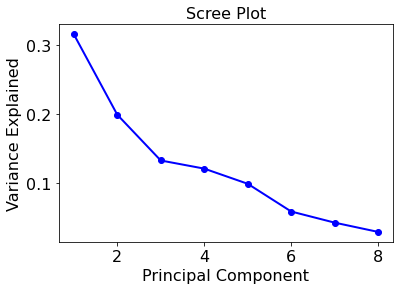

In [39]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


# add PCA results to main dataset

In [28]:
rf_datas = datas.join(pc)
rf_datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number,excavation \nvolume\n[m3],total,kg/m3,upper \n/\nbottom,0,1,2,3,4,5,6,7
0,663.750000,36.870000,131.445000,34.809167,44.732500,183.771667,38.948333,68.928333,17.549167,4.0,667464.0,613.0,98.7,89,0.81,33,2.230058,-0.065129,-0.169103,0.231424,0.879524,-0.040598,0.541111,-0.141830
1,822.733333,43.149333,127.617333,36.636667,44.802000,185.204000,45.538667,68.054000,17.775333,0.0,667464.0,613.0,98.7,89,0.81,33,1.704873,0.167261,0.126869,-0.023024,-0.396376,-0.130021,0.441025,-0.090881
2,824.200000,39.564667,147.118000,38.064000,44.767333,179.578667,43.286667,64.988667,17.205333,4.0,667464.0,613.0,98.7,89,0.81,33,1.034545,0.748133,-0.039577,0.983586,0.712723,-0.241908,0.181935,-0.485666
3,1068.050000,29.999500,130.961000,37.234500,43.778000,185.755500,37.365000,72.341000,17.675500,4.0,667464.0,613.0,98.7,89,0.81,33,2.690752,-0.538261,-0.155024,-0.167080,1.165216,0.308955,-0.221907,0.032712
4,816.800000,39.468667,130.748667,35.665333,45.339333,188.426667,42.001333,66.920000,17.662667,6.0,667464.0,613.0,98.7,89,0.81,33,1.758014,-0.028578,0.301782,-0.307352,0.392540,-0.512273,0.714623,0.004988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,971.166667,46.334444,153.747778,42.774444,44.012778,186.315556,46.153333,66.560556,16.952778,8.0,637107.0,583.0,98.7,97,0.87,33,0.583884,0.002097,1.078783,1.005150,0.231562,-0.475825,-0.451760,-0.273198
7720,1292.333333,50.699167,164.679167,53.374583,47.628333,188.508750,44.476250,66.426250,17.780417,7.0,637107.0,583.0,98.7,97,0.87,33,-1.437083,-1.010232,0.208271,-0.165837,0.317282,-0.154320,0.022298,0.487066
7721,1126.476190,43.469048,160.275714,46.895238,45.613810,188.152381,46.173810,69.385238,17.874762,4.0,637107.0,583.0,98.7,97,0.87,33,-0.085225,-0.800874,0.238199,-0.314732,0.016073,-0.060349,-0.555264,-0.234659
7722,191.600000,25.834000,135.676000,41.258000,43.144000,185.856000,43.430000,67.392000,17.290000,8.0,637107.0,583.0,98.7,97,0.87,33,1.873612,0.663136,0.563149,-0.015940,0.899105,-0.100175,-0.927038,0.112860


# Random forest

In [29]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

# reshuffle the data

In [30]:
rf_datas = rf_datas.sample(frac=1).reset_index(drop=True)
rf_datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number,excavation \nvolume\n[m3],total,kg/m3,upper \n/\nbottom,0,1,2,3,4,5,6,7
0,713.076923,37.846154,129.651538,42.307692,43.953077,185.544615,53.220769,62.003846,18.073846,4.0,738360.0,684.0,98.7,101,0.86,33,0.761533,1.450809,0.179147,-0.524848,-1.247872,-0.776074,-0.554822,0.220514
1,1144.956522,49.618696,151.902609,48.716957,45.591739,188.702609,52.067391,69.020435,17.436522,0.0,645120.0,595.0,98.7,90,0.90,33,-0.425738,-0.352093,1.194396,0.061087,-0.860124,0.191448,-0.523635,-0.074605
2,1283.833333,32.711250,130.360417,50.716667,52.364583,181.124583,52.574167,70.002917,18.011667,4.0,727398.0,673.0,98.7,98,1.28,33,-1.557908,0.742526,-0.026591,-1.850091,-0.286520,2.436683,1.510777,0.195724
3,814.200000,31.749333,128.698667,44.368000,47.346000,187.230667,47.822000,63.678667,17.892667,0.0,742991.0,690.0,98.7,97,0.76,33,0.216274,0.977534,0.251153,-1.218704,0.076264,-0.008643,0.518611,0.544214
4,969.444444,37.318333,184.634444,54.166111,48.198333,177.124444,45.580000,61.237778,18.047778,4.0,722926.0,669.0,98.7,102,1.29,33,-2.402965,0.560857,-1.294709,0.001306,1.004207,-0.082774,-0.412551,-0.281388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,1020.894737,37.647368,134.932632,49.624211,45.144737,187.571053,44.533158,66.790000,18.471579,4.0,709513.0,655.0,98.7,100,1.32,33,0.465594,-0.233592,-0.547239,-0.986843,-0.202726,-0.151445,-0.611347,1.024294
7720,1184.090909,52.511364,164.316818,55.251364,47.122273,186.891364,52.255455,66.471818,17.878636,4.0,695320.0,641.0,98.7,90,0.77,33,-1.872372,-0.442492,0.438171,-0.189916,-0.871347,0.108935,-0.516476,0.211332
7721,819.066667,40.508667,154.431333,40.545333,46.414000,189.619333,50.732667,63.602000,18.005333,0.0,754734.0,700.0,98.7,90,0.39,33,-0.131938,0.403263,0.419049,-0.923874,-0.474817,-0.909913,0.169085,-0.620807
7722,1231.478261,42.295217,197.849565,55.173478,47.286087,184.912609,38.203913,69.250000,17.696522,7.0,715404.0,661.0,98.7,97,0.75,33,-1.756771,-1.743881,-0.515410,0.230366,1.931846,0.091073,-0.830399,-0.338216


# test train split

In [31]:
columns = [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
           'PR dm/min', 'HP bar','HD mm']+[0,1,2]

In [32]:
x = rf_datas[columns] # Features
y = rf_datas['kg/m3'].values  # Target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# train RF

In [34]:
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
rf.fit(x_train, y_train)

C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=600, random_state=42)

# Predict with RF and evaluate

In [35]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse,rmse)

C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.04007911627540506 0.2001976929822246


# feature importance

Text(0, 0.5, 'Mean decrease in impurity')

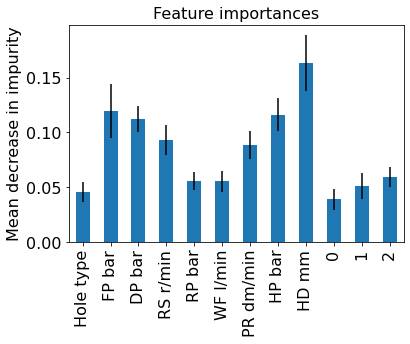

In [36]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

# visual check on pred and act

In [37]:
rf_out = pd.DataFrame(prediction, columns=['pred'])
rf_out['act'] = y_test
rf_out = rf_out.sort_values(by=['act']).reset_index(drop=True)
rf_out

,pred,act
0,0.174783,0.00
1,0.456700,0.00
2,0.401183,0.00
3,0.115617,0.00
4,0.059883,0.00
...,...,...
2313,1.380850,1.53
2314,1.450767,1.53
2315,1.000533,1.53
2316,0.933250,1.53


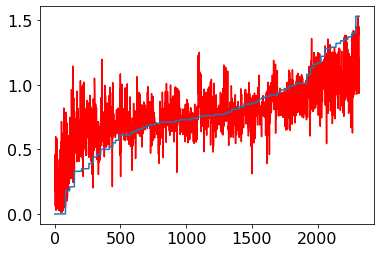

In [38]:
plt.plot(rf_out.pred, color='red')
plt.plot(rf_out.act)